<a href="https://colab.research.google.com/github/Daniel-Francisco-Calderon-Lebro/Vision_por_Computador/blob/main/Copia_de_TransformacionesPunto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # para visualizar imágenes
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
ruta = '/content/drive/Shareddrives/JPDP/2023_1/Vision/'
Max_level = 255
r = np.linspace(0,Max_level,Max_level+1) # posibles entradas
r

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

## Inversa

$$s = (L-1)-r$$

[255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238
 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220
 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202
 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184
 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148
 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130
 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112
 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95  94
  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76
  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58
  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42  41  40
  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22
  21  20  19  18  17  16  15  14  13  12  11  10   

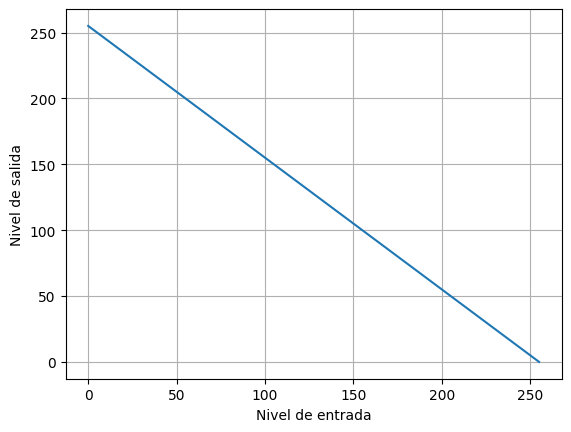

In [ ]:
LUT_inversa =( Max_level - r).astype(np.uint8)
print(LUT_inversa)
plt.plot(r,LUT_inversa)
plt.grid();plt.xlabel('Nivel de entrada');plt.ylabel('Nivel de salida');

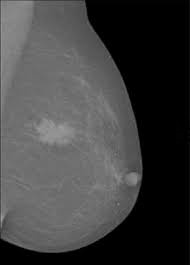

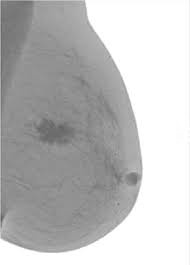

In [ ]:
fname = ruta + 'mama.jpg'
img = io.imread(fname)
img_inv = cv.LUT(img, LUT_inversa)
cv2_imshow(img)
cv2_imshow(img_inv)

## Lineal

$$s=a\cdot r + b$$

**Implemente esta transformación y analice su comportamiento ante distintos parámetros**

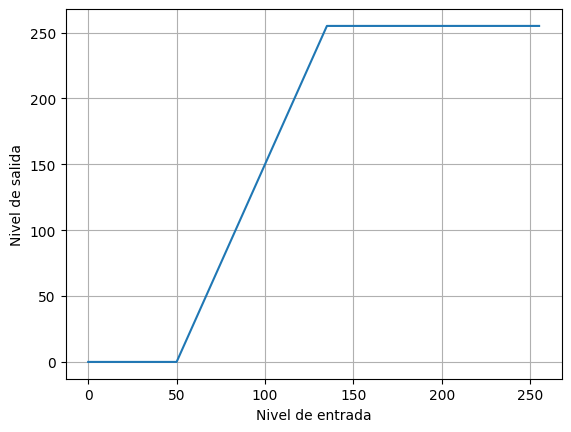

In [ ]:
## Su código
a = 3
b = -150

LUT_lineal = (a*r + b)
LUT_lineal = np.where(LUT_lineal>Max_level,Max_level,LUT_lineal)
LUT_lineal = np.where(LUT_lineal<0,0,LUT_lineal)
LUT_lineal = LUT_lineal.astype(np.uint8)

plt.plot(r,LUT_lineal)
plt.grid();plt.xlabel('Nivel de entrada');plt.ylabel('Nivel de salida');

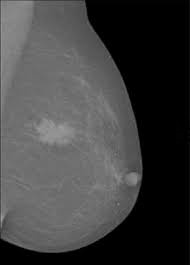

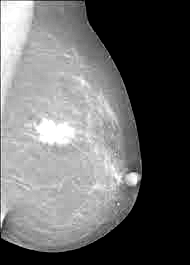

In [ ]:
fname = ruta + 'mama.jpg'
img = io.imread(fname)
img_lin = cv.LUT(img, LUT_lineal)
cv2_imshow(img)
cv2_imshow(img_lin)

## Logarítmica

$$s=c\log(1+r)$$
* Las curvas se mantienen bajo el supuesto de normalización.

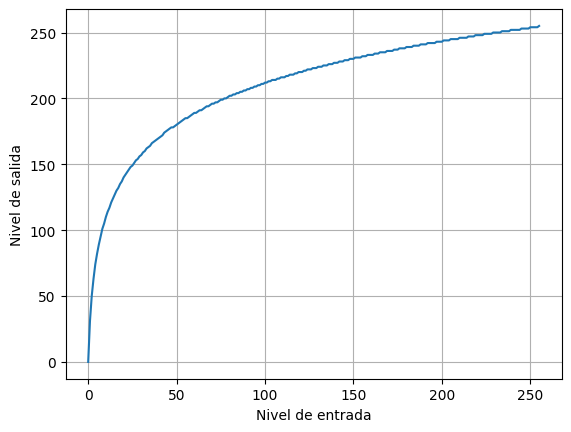

In [ ]:
c = Max_level /(np.log(1 + Max_level))
LUT_log = (c*np.log(1+r)).astype(np.uint8)
plt.plot(r,LUT_log)
plt.grid();plt.xlabel('Nivel de entrada');plt.ylabel('Nivel de salida');

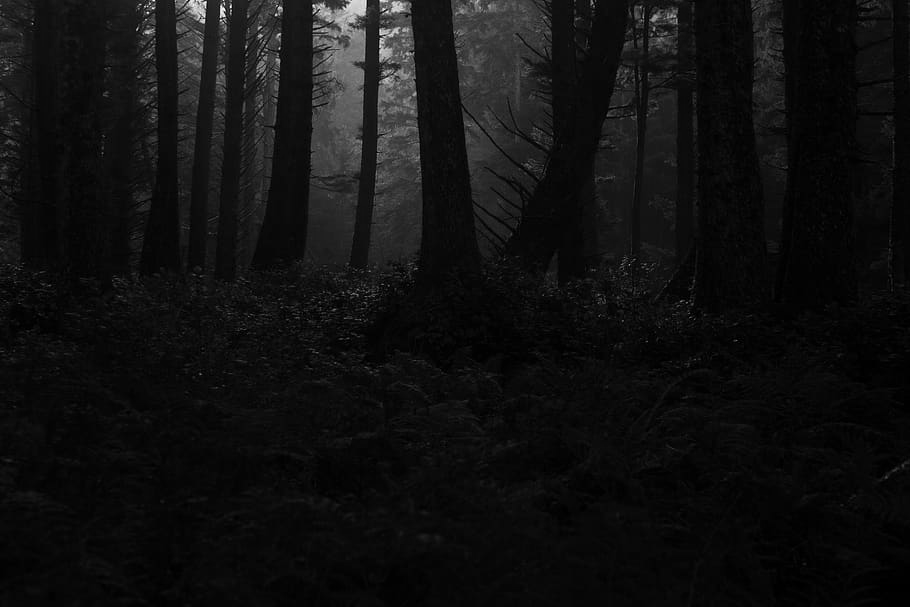

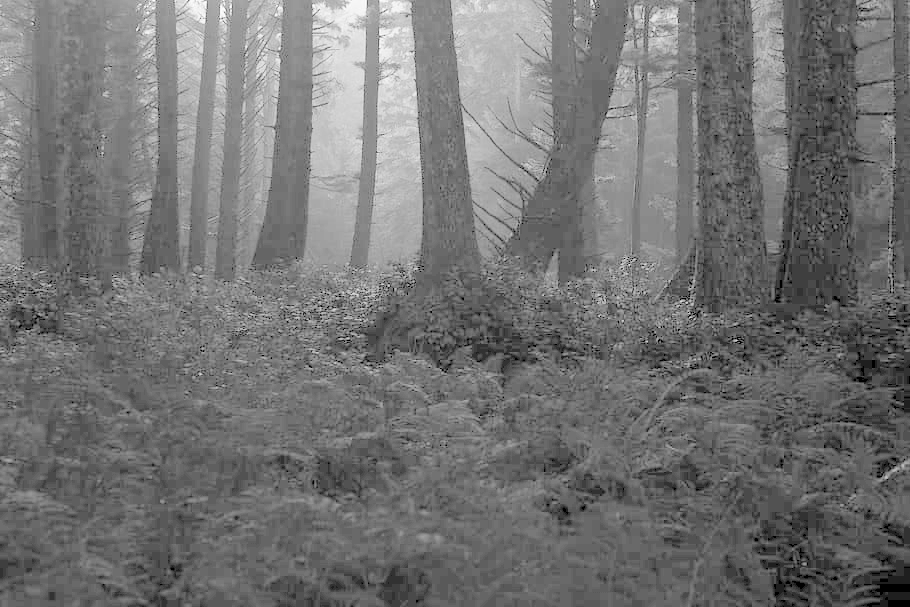

In [ ]:
fname = ruta + 'bosque_osc.jpg'

img = io.imread(fname)
if img.shape[-1]==3:
  img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_log = cv.LUT(img, LUT_log)
cv2_imshow(img)
cv2_imshow(img_log)


**Implemente la transformación con log inverso**

In [ ]:
## Su código


## Potencia (Corrección gamma)
$$s=c\cdot r^\gamma$$

**Implemente esta transformación y analice su comportamiento ante distintos parámetros**

- si $r=0$ entonces $s=0$
- si $r=L-1$ entonces $s=c\cdot (L-1)^\gamma = L-1$
- entonces $c=\frac{L-1}{(L-1)^\gamma}=(L-1)^{1-\gamma}$

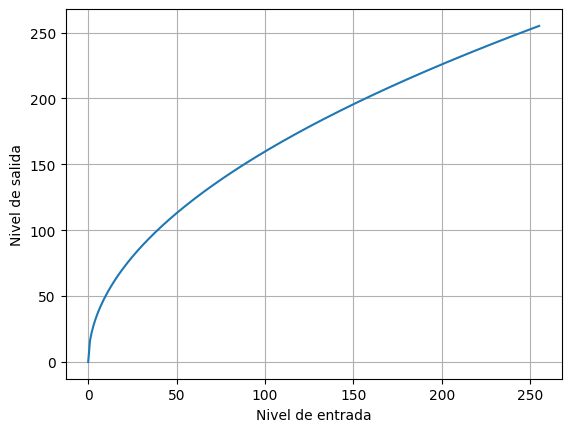

In [ ]:
## Su código
gamma = 0.5
c = Max_level/(Max_level**gamma)
LUT_gamma = c*r**gamma
plt.plot(r,LUT_gamma)
plt.grid();plt.xlabel('Nivel de entrada');plt.ylabel('Nivel de salida');

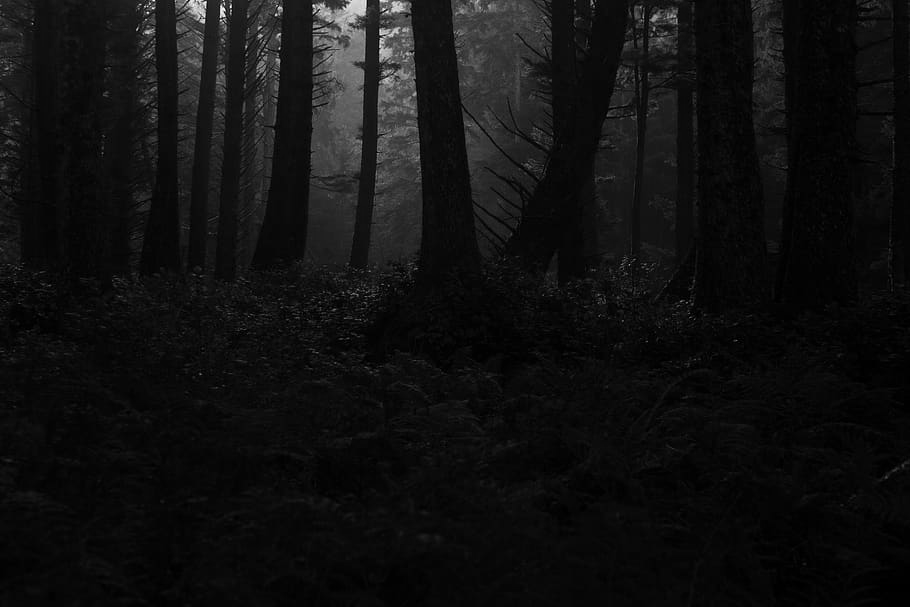

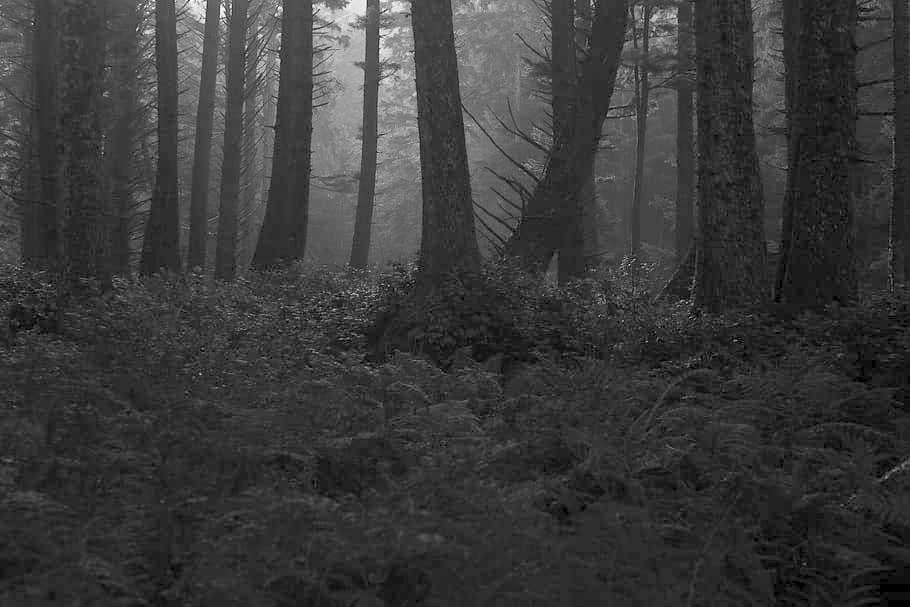

In [ ]:
fname = ruta + 'bosque_osc.jpg'
img = io.imread(fname)
if img.shape[-1]==3:
  img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_gamma = cv.LUT(img, LUT_gamma)
cv2_imshow(img)
cv2_imshow(img_gamma)


## Ejercicio

Defina una transformación por tramos basada en funciones lineales

In [ ]:
puntos = [[0,0],
          [50,25],
          [150,200],
          [200,220],
          [255,255]]

len(puntos)

5